<img src="./logo_UTN.svg" align="right" width="250" /> 

#### Teoría de Circuitos II - R4001
# Trabajo semanal 3
#### Benjamín Ithurburu

### Introducción: 
En este notebook diseñará un filtro a partir de la siguiente plantilla.

<center><img src="./plantilla_ejercicio.png" width="300"/></center>
<center><img src="./datos_ejercicio.png" width="300"/></center>


In [7]:
from IPython.display import IFrame
IFrame("./Trabajo semanal 3.pdf", width=1000, height=1000)

### Simulación
A continuación se procede a instanciar funciones y configurar el entorno del notebook para su posterior uso en las simulaciones.

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import TransferFunction

from pytc2.sistemas_lineales import simplify_n_monic, parametrize_sos, pzmap, GroupDelay, bodePlot, tfcascade
from pytc2.general import print_subtitle

# Configuración de parámetros para fijar estilo de gráficos en notebook. 
# Con el objetivo de que el tamaño de salida, sea adecuado al jubyter notebook.

#%% Inicialización de librerías

# Para eliminar bugs:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 14
fig_sz_y = 8
fig_dpi = 70
fig_front_size = 15

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_front_size})

#%% Fin - Inicialización de librerías

#### Simulación Python transferencia normalizada
En el siguiente código Python se realiza la simulación de la función transferencia normalizada obtenida en el punto **3)**, para el Filtro Pasa-Bajos de orden 3 obtenido a partir de la plantilla. Obteniendose el gráfico de módulo, fase, diagráma de polos y ceros, y retardo de grupo.

\begin{equation}
H(s) = \frac{1}{s^2+s+1}\cdot\frac{1}{s+1}
\tag{1}
\end{equation}

Siendo $\Omega_w=\omega_o=\frac{1}{\sqrt[3]{\varepsilon}}$

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

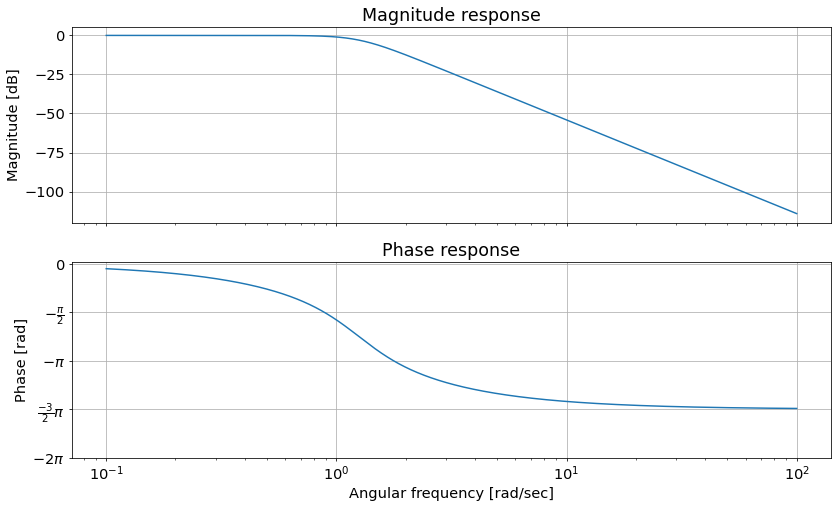

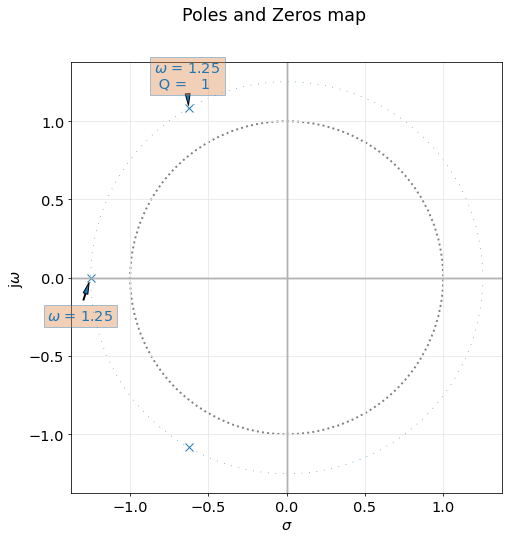

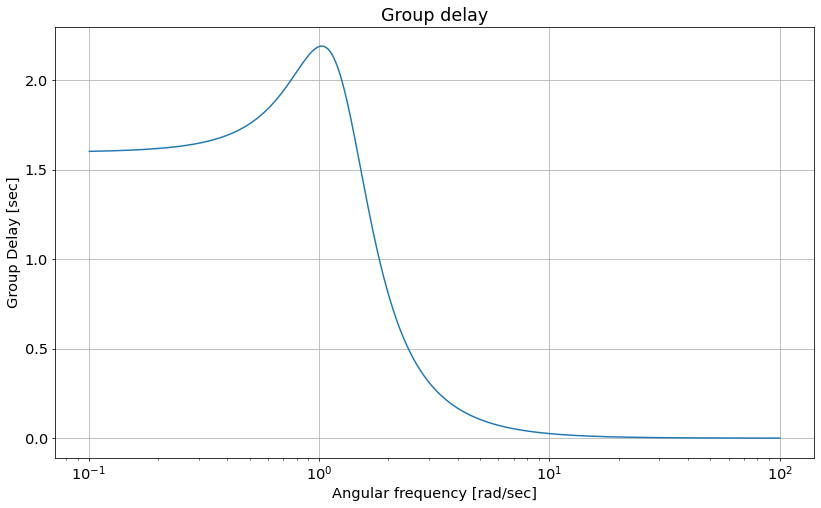

In [9]:
alfa_max = 1
ee_2 = 10**(alfa_max/10)-1
ee = np.sqrt(ee_2)

# Código para análisis del filtro de orden 3 obtenido
num = [1/ee]
den = [1, 2/np.cbrt(ee), 2/np.cbrt(ee_2), 1/ee]

# Obtención de función transferencia
my_tf = TransferFunction(num,den)

# Gráfico Bode
bodePlot(my_tf, fig_id=1)

# Gráfico de Polos y Ceros
pzmap(my_tf, True, fig_id=2)

# Group Delay
GroupDelay(my_tf, fig_id=3)

#### Simulación LTspice red RLC normalizada
A continuación se realiza la simulación con LTspice de la red normalizada obtenida en el punto **3)**, graficándose su respuesta en frecuencia, tanto en módulo como en fase.

##### Esquemático
<center><img src="./circuito_simulacion_RLC_normalizado.png" width="800"/></center>

##### Respuesta en frecuencia
<center><img src="./bode_simulacion_RLC_normalizado.png" width="1000"/></center>

$f_{pn}=\frac{w_{pn}}{2\pi}=\frac{1}{2\pi}\approx0.159$ ; $f_{sn}=\frac{w_{sn}}{2\pi}=\frac{2}{2\pi}\approx0.318$

#### Simulación LTspice red RLC desnormalizada
A continuación se realiza la simulación con LTspice de la red desnormalizada obtenida en el punto **4)**, graficándose su respuesta en frecuencia, tanto en módulo como en fase.

##### Esquemático
<center><img src="./circuito_simulacion_RLC_desnormalizado.png" width="800"/></center>

##### Respuesta en frecuencia
<center><img src="./bode_simulacion_RLC_desnormalizado.png" width="1000"/></center>

$f_p=1500Hz$ ; $f_s=3000Hz$

#### Simulación LTspice red activa normalizada
A continuación se realiza la simulación con LTspice de la red activa sin inductor, obtenida en el punto **5)**, graficándose su respuesta en frecuencia, tanto en módulo como en fase.

##### Esquemático
<center><img src="./circuito_simulacion_RCO_normalizado.png" width="800"/></center>

##### Respuesta en frecuencia
<center><img src="./bode_simulacion_RCO_normalizado.png" width="1000"/></center>

$f_{pn}=\frac{w_{pn}}{2\pi}=\frac{1}{2\pi}\approx0.159$ ; $f_{sn}=\frac{w_{sn}}{2\pi}=\frac{2}{2\pi}\approx0.318$

### Conclusión
En el gráfico de LTspice se aprecia la respuesta en frecuencia del filtro de máxima planicidad previamente calculado. Se observa que a una frecuencia de 1,5 kHz, la atenuación es de aproximadamente $1dB$, confirmando así los requisitos de la plantilla. También se verifica lo calculado en los documentos PDF. Además, a una frecuencia cercana a los 3 kHz, la atenuación es de $12,44dB$, lo que cumple aproximadamente con los criterios de la plantilla.